# Detect Suits in Playing Cards
This notebook shows how to use an object detection model from LandingLens to detect suits on playing cards. A webcam is used to take photos of playing cards.

In [1]:
#@title Set the following variables as needed for your setup
# These keys correspond to a public LandingLens model
api_key         = "bu8y8czyonaip6ceov75nfnlpnr9blh"  #@param {type:"string"}
api_secret      = "mdebq6hxq19fg86k3p53rwcxh16h2qudcfonl6sjrde334y2vxz4qj4wnefh05"  #@param {type:"string"}
model_endpoint  =  "d6447e24-85a6-4815-8eec-7cd66530bc5e" #@param {type:"string"}


In [2]:
# Install dependencies only if needed to avoid unnecesary restarts
try:
  import landingai
except ImportError:
  import os
  from IPython.display import display, Markdown
  display(Markdown("##Installing modules. You will need to restart runtime."))
  %pip install landingai
  display(Markdown("##Stopping RUNTIME! Please restart runtime."))
  os.kill(os.getpid(), 9) # This is a way to force a restart

## Acquire an Image from Your Webcam

Saved to /tmp/photo.jpg


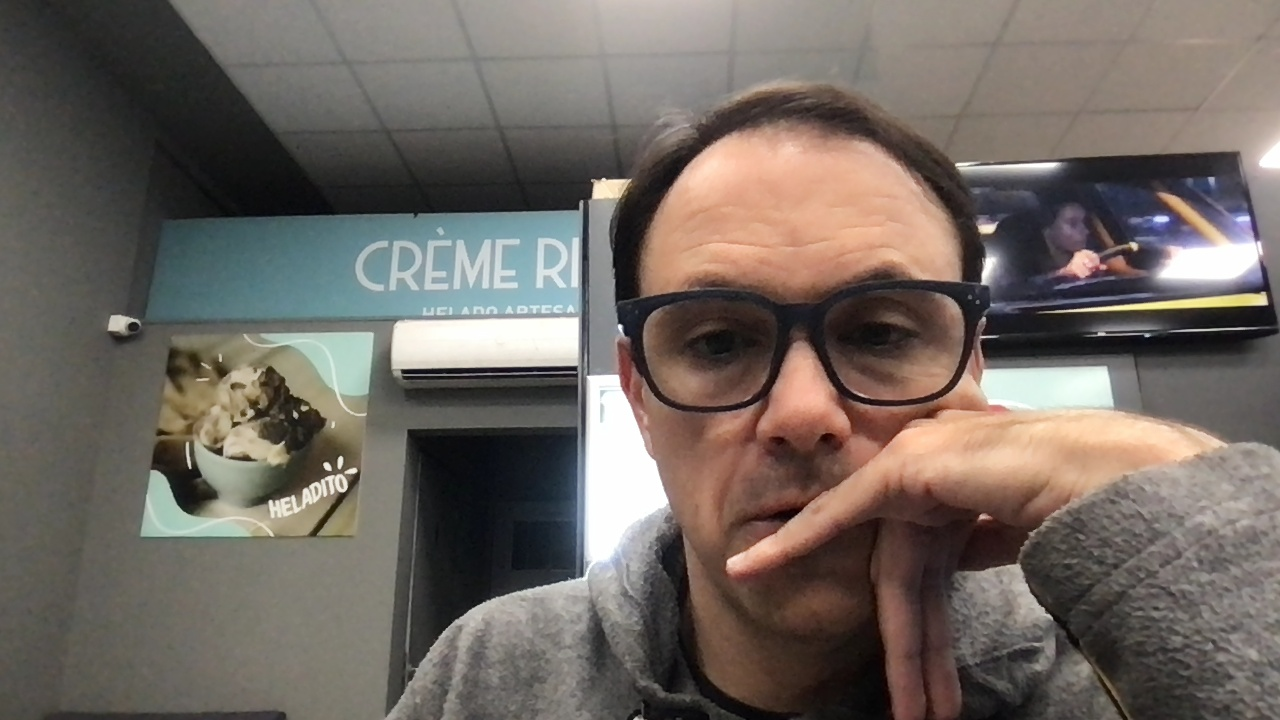

In [4]:
from IPython.display import Image
import cv2
from matplotlib import pyplot as plt
from landingai.io import read_from_notebook_webcam

take_photo=read_from_notebook_webcam() 
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

frame = cv2.imread(filename)
# Convert color space to RGB
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

## Run Inference Using the Object Detection Model

In [5]:
from landingai.predict import Predictor
from landingai.visualize import overlay_predictions
        
predictor = Predictor(model_endpoint, api_key, api_secret)

# Run prediction and show raw results
results = predictor.predict(frame)
display(results)

[ObjectDetectionPrediction(score=0.35867151618003845, label_name='Spade', label_index=4, id='8c20f5ea-2271-4f26-928c-935f505fc138', bboxes=(103, 310, 149, 347)),
 ObjectDetectionPrediction(score=0.3507174253463745, label_name='Spade', label_index=4, id='faa83d6e-c66d-4f38-bfac-679cbc455b1d', bboxes=(174, 470, 225, 519))]

## Visualize the Results

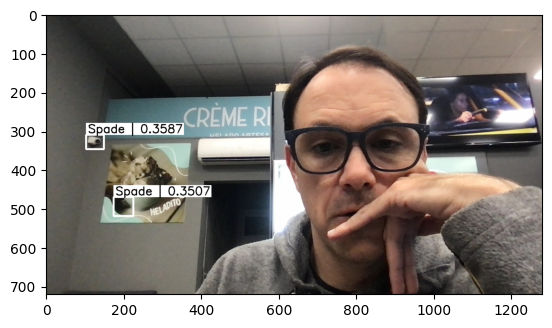

In [6]:
# Draw raw results on the original image
frame_with_preds = overlay_predictions(results, image=frame)

plt.imshow(frame_with_preds)
plt.show()


## Process the Results to Count the Number of Suits (Objects)

In [7]:
from IPython.display import display, Markdown
# Filter only high confidence detections and count them
filtered_results = [x for x in results if x.score  > 0.5] 
display(Markdown(f"# Found {len(filtered_results)} suits"))


# Found 0 suits